# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import os

# Data Collection and Preprocessing

In [2]:
#change working directory
os.chdir("C:\\Users\\bittu.p\\Desktop\\practice")

In [3]:
#import dataset
loan_dataset = pd.read_csv("Loan_data.csv")

In [4]:
#first 5 rows of dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#rows and columns of dataset
loan_dataset.shape

(614, 13)

In [6]:
#statistics of dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#find null values
loan_dataset.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#null values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

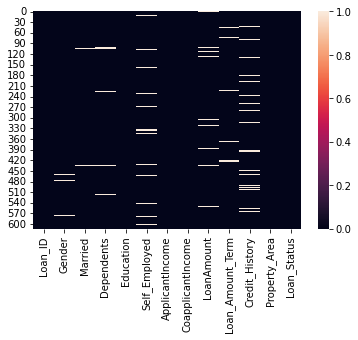

In [9]:
#null values in heatmap
sns.heatmap(loan_dataset.isnull())

In [10]:
#drop all null values
loan_dataset1 = loan_dataset.dropna()

In [11]:
#0 null values
loan_dataset1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

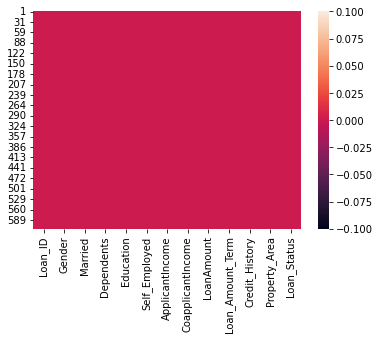

In [12]:
#heatmap without any null value
sns.heatmap(loan_dataset1.isnull())

In [13]:
#replace get loan = 1 an not get loan = 0
loan_dataset1.replace({"Loan_Status": {"N":0,"Y":1}},inplace = True)

C:\Users\bittu.p\AppData\Local\Temp\ipykernel_6524\1610352720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset1.replace({"Loan_Status": {"N":0,"Y":1}},inplace = True)


In [14]:
loan_dataset1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
loan_dataset1['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
#replace +3(more than 2 dependents) in dependents to 3
loan_dataset1.replace({"Dependents": {"3+":3}},inplace = True)

C:\Users\bittu.p\AppData\Local\Temp\ipykernel_6524\2322669708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset1.replace({"Dependents": {"3+":3}},inplace = True)


In [17]:
loan_dataset1['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

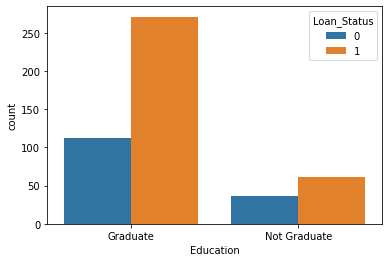

In [18]:
#countplot of education who get loan or not
sns.countplot(x='Education', hue= 'Loan_Status', data=loan_dataset1)

<AxesSubplot:xlabel='Married', ylabel='count'>

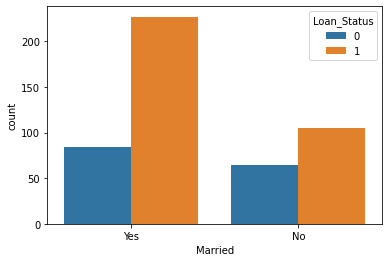

In [19]:
#countplot of marrital status who get loan or not
sns.countplot(x='Married', hue= 'Loan_Status', data=loan_dataset1)

In [20]:
#replace all categorical values with numerical values
loan_dataset1.replace(
                      {"Married": {"No":0,"Yes":1}, 
                       "Gender": {"Female":0,"Male":1}, 
                       "Self_Employed": {"No":0,"Yes":1},
                       "Property_Area": {"Rural":0,"Semiurban":1,"Urban":2},
                       "Education": {"Not Graduate":0,"Graduate":1}},
                       inplace = True)

C:\Users\bittu.p\AppData\Local\Temp\ipykernel_6524\3250318857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset1.replace(


In [21]:
loan_dataset1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
#dependent variable = y and non-dependent variable = x
X = loan_dataset1.drop(columns=['Loan_ID' , 'Loan_Status'] , axis = 1)
Y = loan_dataset1['Loan_Status']

In [23]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [24]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# Train Test Split

In [25]:
#disrtibute training and testing dataset with 10% test datset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [27]:
print(Y.shape, Y_train.shape, Y_test.shape)

(480,) (432,) (48,)


# Training the model : support vector model

In [28]:
#support vector model
classifier = svm.SVC(kernel='linear')

In [29]:
#fit training set
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [30]:
#check accuracy score
X_train_prediction  = classifier.predict(X_train)
accuracy_score(Y_train, X_train_prediction)

0.7708333333333334

In [31]:
X_test_prediction  = classifier.predict(X_test)
accuracy_score(Y_test, X_test_prediction)

0.7708333333333334

# Predictive System

In [32]:
#predict the person get loan or not by input data. paste any 11 attributes in input_data and see result in the form of 1 and 0
#1 means get loan and 0 means not get loan
input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshape)
print(prediction)

[1]


C:\Users\bittu.p\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
